In [32]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import opendatasets as od
from PIL import Image

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

# Test what we can do with images

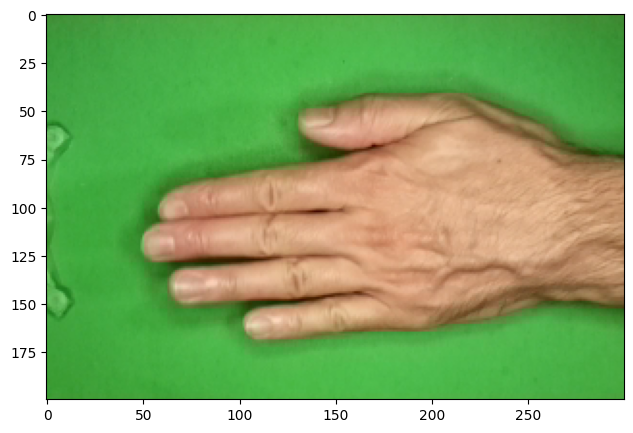

In [108]:
image = np.array(Image.open('data/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png'))
plt.imshow(image)
plt.show()

In [36]:
flipped1 = tf.image.flip_left_right(image)
flipped2 = tf.image.flip_up_down(image)
flipped3 = tf.image.flip_up_down(flipped1)
flipped = [image, flipped1, flipped2, flipped3]

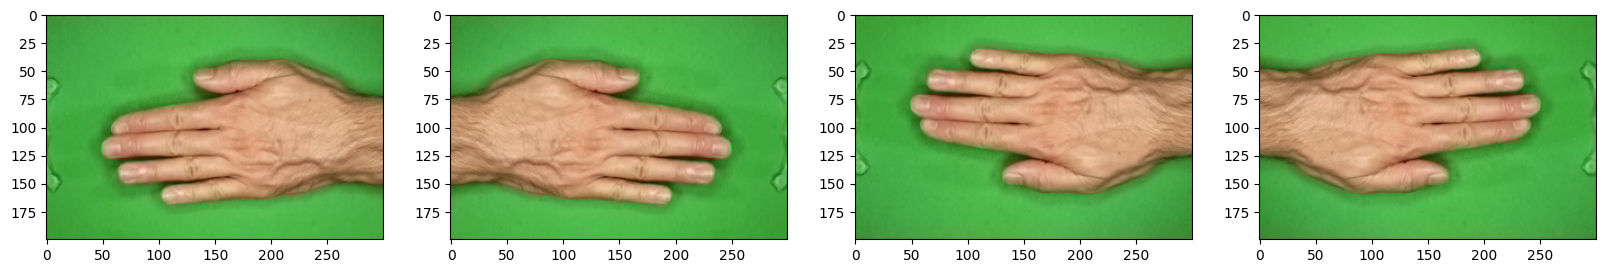

In [37]:
fig, ax = plt.subplots(1, len(flipped))
for i,img in enumerate(flipped):
    ax[i].imshow(img)
plt.show()

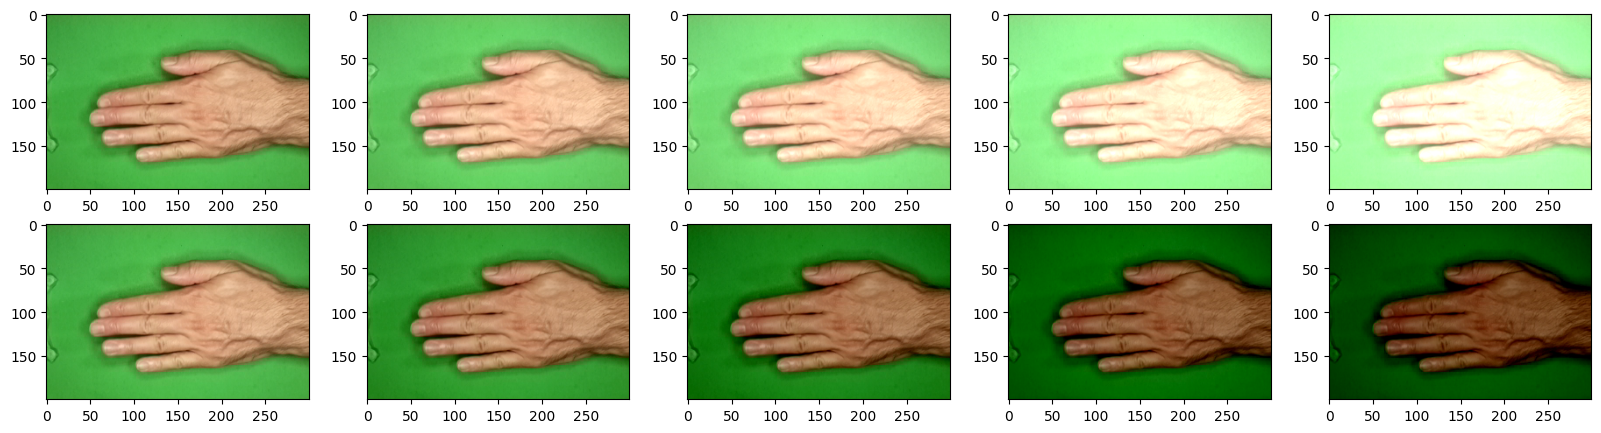

In [59]:
N,M = 2,5
fig, ax = plt.subplots(N, M)
for i in range(N):
    for j in range(M):
        ax[i,j].imshow(tf.image.adjust_brightness(image, (j/10)*(-1)**i))
plt.show()

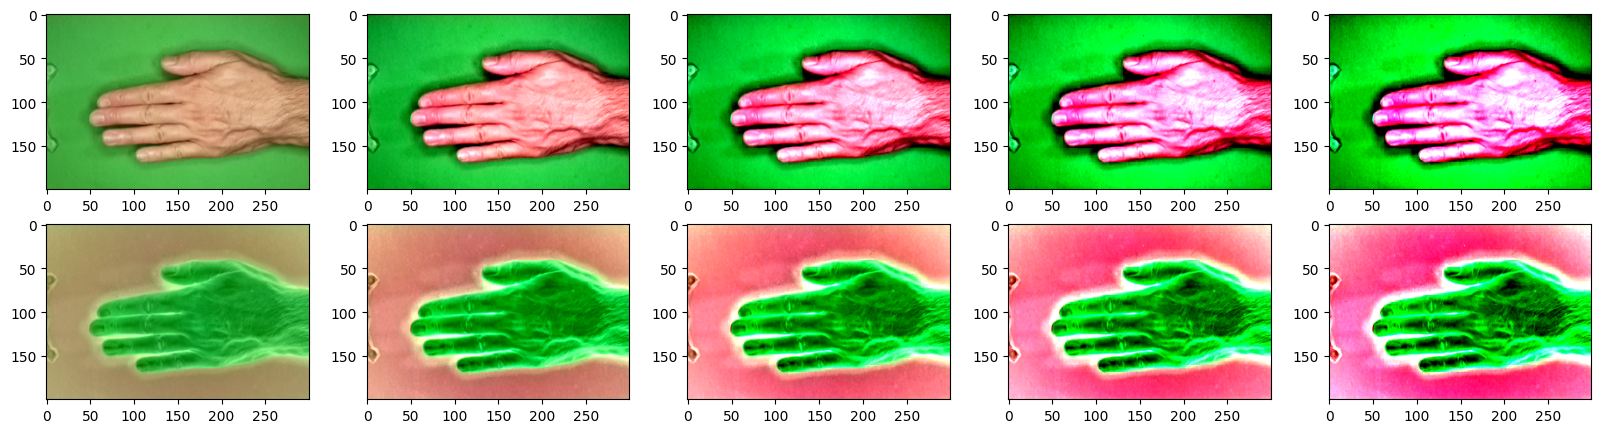

In [66]:
N,M = 2,5
fig, ax = plt.subplots(N, M)
for i in range(N):
    for j in range(M):
        ax[i,j].imshow(tf.image.adjust_contrast(image, (j+1)*(-1)**i))
plt.show()

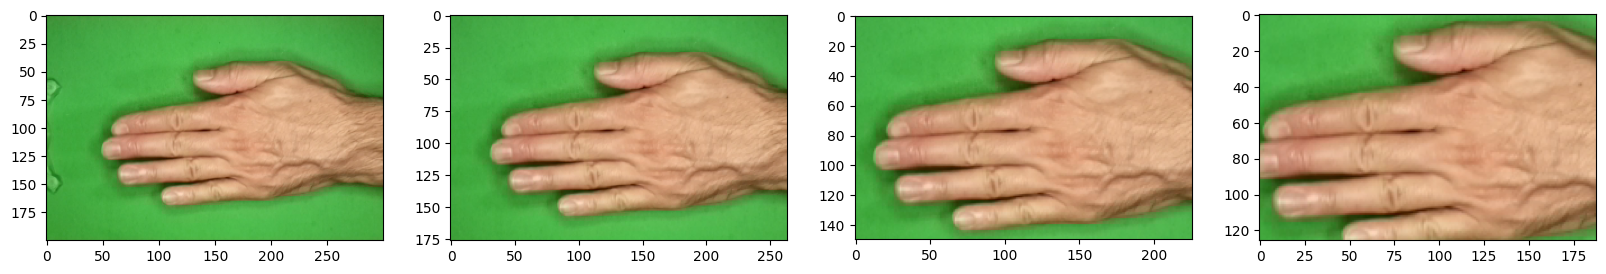

In [82]:
N = 4
fig, ax = plt.subplots(1, N)
for i in range(N):
    ax[i].imshow(tf.image.central_crop(image, 1-i/8))
plt.show()

In [116]:
grayscale = np.array(tf.image.grayscale_to_rgb(tf.image.rgb_to_grayscale(image)))

no_red = image.copy()
no_red[:,:,0] = 0

no_green = image.copy()
no_green[:,:,1] = 0

no_blue = image.copy()
no_blue[:,:,2] = 0

max_red = image.copy()
max_red[:,:,0] = 255

max_green = image.copy()
max_green[:,:,1] = 255

max_blue = image.copy()
max_blue[:,:,2] = 255

other_colors = np.array([[image, no_red, no_green, no_blue],
                         [grayscale, max_red, max_green, max_blue]])

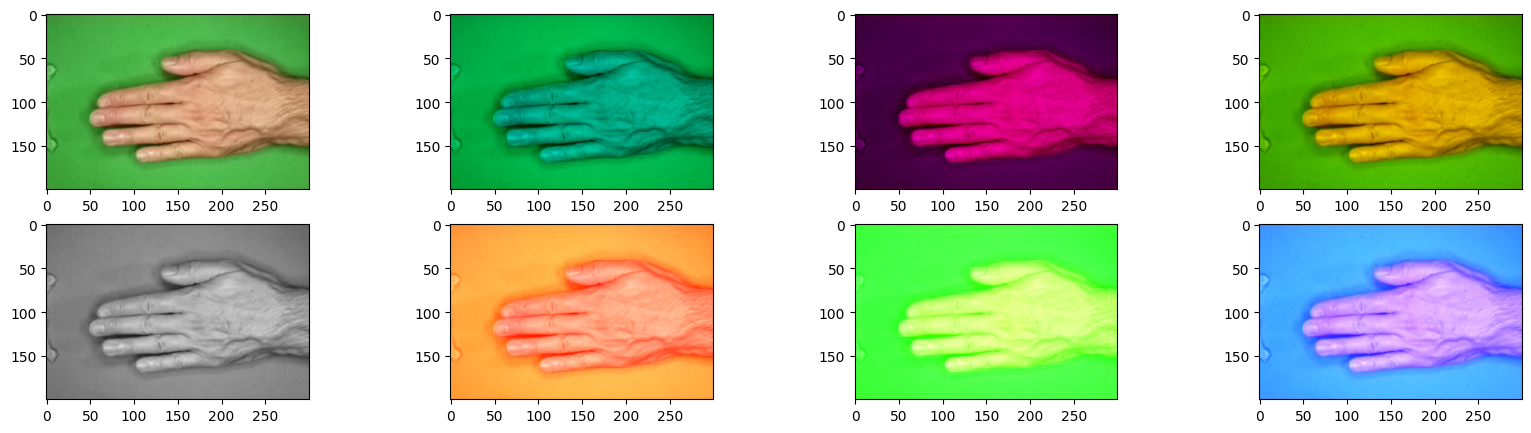

In [119]:
N, M = other_colors.shape[0], other_colors.shape[1]
fig, ax = plt.subplots(N, M)
for i in range(N):
    for j in range(M):
        ax[i,j].imshow(other_colors[i,j])
plt.show()

# KNN on augmented dataset